# Upper-Limb Functioning Analysis


This notebooks demonstrates how to use the ```ulfunc``` package of the ```monalysa``` library to quantify different constructs of upper limb functioning.

## Install the most recent monalysa library

In [1]:
pip install monalysa --upgrade

  Obtaining dependency information for monalysa from https://files.pythonhosted.org/packages/7a/59/47ca6a5a1bfa19a4e1f986027b458463f912528e0a9d16b8336324d2ada7/monalysa-0.2.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
sys.path.append('../../')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import matplotlib.dates as md

c:\Users\Tanya\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
from monalysa import ulfunc
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [11]:
start_time = '16:20'
end_time = '16:30'

windur = 60
winshift = 5
right = pd.read_csv("D:/monalysa_tutorial/data/right.csv", parse_dates=["time"], index_col="time")
# right = right[right.subject==1]
# right = right.between_time(start_time, end_time)
r_t = np.arange(len(right))

_, r_amag, r_use = ulfunc.uluse.from_gmac(accl=np.array(right[['ax', 'ay', 'az']]), fs=50, accl_farm_inx=0, elb_to_farm=True)
r_tavuse, r_avuse = ulfunc.uluse.average_uluse(usesig=r_use, windur=windur, winshift=winshift, sample_t=50)
r_tint, r_int = ulfunc.ulint.from_vector_magnitude(vecmag=r_amag, usesig=r_use, nsample=1)
r_tavint, r_avint = ulfunc.ulint.average_intuse(intsig=r_int, usesig=r_use, windur=windur, winshift=winshift, sample_t=50)

left = pd.read_csv("D:/monalysa_tutorial/data/left.csv", parse_dates=["time"], index_col="time")
# left = left[left.subject==1]
# left = left.between_time(start_time, end_time)
l_t = np.arange(len(left))

_, l_amag, l_use = ulfunc.uluse.from_gmac(accl=np.array(left[['ax', 'ay', 'az']]), fs=50, accl_farm_inx=0, elb_to_farm=True)
l_tavuse, l_avuse = ulfunc.uluse.average_uluse(usesig=l_use, windur=windur, winshift=winshift, sample_t=50)
l_tint, l_int = ulfunc.ulint.from_vector_magnitude(vecmag=l_amag, usesig=l_use, nsample=1)
l_tavint, l_avint = ulfunc.ulint.average_intuse(intsig=l_int, usesig=l_use, windur=windur, winshift=winshift, sample_t=50)

TypeError: average_uluse() got an unexpected keyword argument 'sample_t'

## Temporal Profile of Upper-Limb Functioning

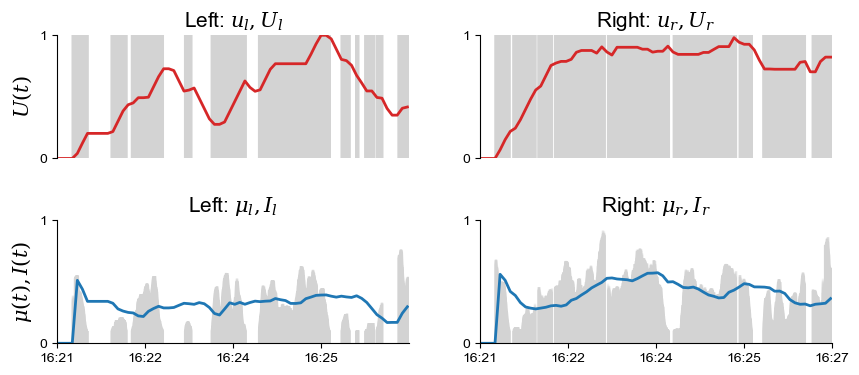

In [25]:
plt.figure(figsize=(10, 4))
a1 = plt.subplot(2, 2, 1)
plt.vlines(x=l_t[l_use==1], ymin=0, ymax=1, colors='lightgray', alpha=0.1)
plt.plot(l_tavuse, l_avuse, 'tab:red', linewidth=2)
plt.yticks([0, 1])
plt.ylim([0, 1])
plt.xlim([0, len(left)])
plt.ylabel("$U(t)$", fontsize=15)
plt.xticks([])
plt.title('Left: $u_l, U_l$', fontsize=15)
a1.spines[['right', 'top', 'bottom']].set_visible(False)

a2 = plt.subplot(2, 2, 2)
plt.vlines(x=r_t[r_use==1], ymin=0, ymax=1, colors='lightgray', alpha=0.1)
plt.plot(r_tavuse, r_avuse, 'tab:red', linewidth=2)
plt.yticks([0, 1])
plt.ylim([0, 1])
plt.xlim([0, len(right)])
plt.xticks([])
plt.title('Right: $u_r, U_r$', fontsize=15)
a2.spines[['right', 'top', 'bottom']].set_visible(False)


a3 =plt.subplot(2, 2, 3)
plt.vlines(x=l_tint, ymin=0, ymax=l_int, colors='lightgray', alpha=0.1)
plt.plot(l_tavint, l_avint, 'tab:blue', linewidth=2)
plt.yticks([0, 1])
plt.ylim([0, 1])
plt.xlim([0, len(left)])
plt.ylabel("$\mu(t), I(t)$", fontsize=15)
plt.xticks(l_t[::int(len(left)/4)], left.index[::int(len(left)/4)].strftime('%H:%M'))
plt.title('Left: $\mu_l, I_l$', fontsize=15)
a3.spines[['right', 'top']].set_visible(False)

a4 = plt.subplot(2, 2, 4)
plt.vlines(x=r_tint, ymin=0, ymax=r_int, colors='lightgray', alpha=0.1)
plt.plot(r_tavint, r_avint, 'tab:blue', linewidth=2)
plt.yticks([0, 1])
plt.ylim([0, 1])
plt.xlim([0, len(right)])
plt.xticks(r_t[::int(len(right)/4)], right.index[::int(len(right)/4)].strftime('%H:%M'))
plt.title('Right: $\mu_r, I_r$', fontsize=15)
a4.spines[['right', 'top']].set_visible(False)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Use vs. Intensity (UI) plot

Text(0.5, 0, '$I$ (+ve: Right, -ve:Left)')

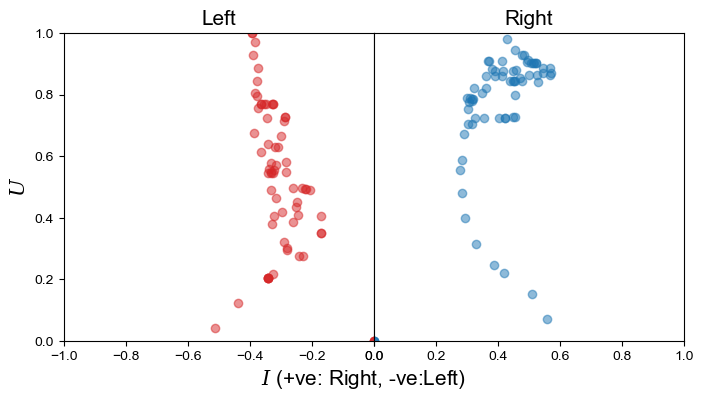

In [26]:
fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(-l_avint, l_avuse, c='tab:red', alpha=0.5)
plt.xlim([-1, 0])
plt.ylim([0, 1])
plt.title('Left', fontsize=15)
plt.ylabel('$U$', fontsize=15)

plt.subplot(1, 2, 2)
plt.scatter(r_avint, r_avuse, alpha=0.5)
plt.yticks([])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Right', fontsize=15)

plt.subplots_adjust(wspace=0)
fig.text(0.5, 0, '$I$ (+ve: Right, -ve:Left)', ha='center', fontsize=15)

## Relative Use of the Upper-Limbs

### Bilateral Magnitude vs Magnitude Ratio (BMMR) plot

(-0.9, 0.9)

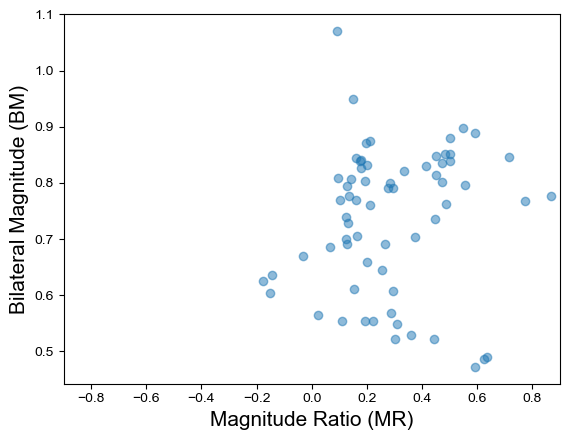

In [27]:
inx = l_avint!=0
mag_ratio = np.log(r_avint[inx]/l_avint[inx])
bilat_mag = r_avint[inx]+l_avint[inx]

plt.scatter(mag_ratio, bilat_mag, alpha=0.5)
plt.xlabel('Magnitude Ratio (MR)', fontsize=15)
plt.ylabel('Bilateral Magnitude (BM)', fontsize=15)
plt.xlim([-0.9, 0.9])

### Left Intensity vs. Right Intensity (LIRI) plot

(0.0, 0.6)

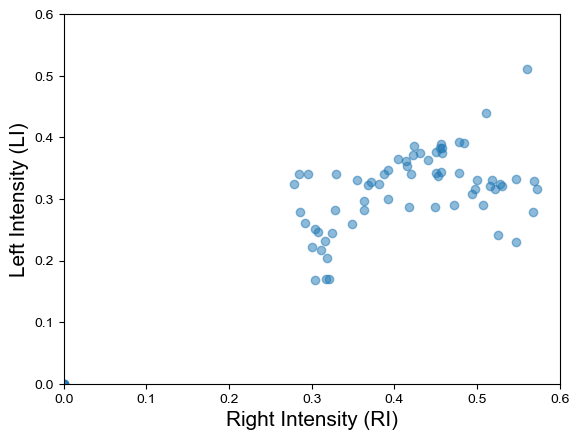

In [28]:
plt.scatter(r_avint, l_avint, alpha=0.5)
plt.xlabel('Right Intensity (RI)', fontsize=15)
plt.ylabel('Left Intensity (LI)', fontsize=15)
plt.xlim([0, 0.6])
plt.ylim([0, 0.6])

### Intensity Sum vs. Intensity Difference (ISID) plot

Text(0, 0.5, 'Intensity Sum (IS)')

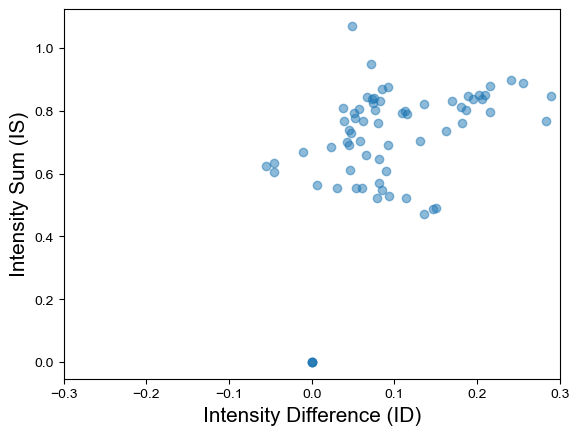

In [29]:
idiff = r_avint - l_avint
isum = r_avint + l_avint

plt.scatter(idiff, isum, alpha=0.5)
plt.xlim([-0.3, 0.3])
plt.xlabel('Intensity Difference (ID)', fontsize=15)
plt.ylabel('Intensity Sum (IS)', fontsize=15)